# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [20]:
#Step 1. Import the necessary libraries
import pandas as pd
# step 2 & 3. internet connection to download the data
data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(data_url, sep='|', index_col='user_id')


In [289]:
#Step 4.Discover the mean age per occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean().reset_index()
mean_age_by_occupation.columns = ['occupation', 'mean_age']

print(mean_age_by_occupation)

       occupation  mean_age
0   administrator     38.75
1          artist     31.39
2          doctor     43.57
3        educator     42.01
4        engineer     36.39
5   entertainment     29.22
6       executive     38.72
7      healthcare     41.56
8       homemaker     32.57
9          lawyer     36.75
10      librarian     40.00
11      marketing     37.62
12           none     26.56
13          other     34.52
14     programmer     33.12
15        retired     63.07
16       salesman     35.67
17      scientist     35.55
18        student     22.08
19     technician     33.15
20         writer     36.31


In [290]:
#Step 5.Discover what is the mean age per occupation
def male_ratio(gender):
    if gender == 'M':
        return 1
    elif gender == 'F':
        return 0

users['male_ratio'] = users['gender'].apply(male_ratio)
male_ratio_by_occupation = users.groupby('occupation')['male_ratio'].mean().sort_values(ascending=False).reset_index()
male_ratio_by_occupation['male_ratio'] = (male_ratio_by_occupation['male_ratio'] * 100).map("{:.2f}%".format)
male_ratio_by_occupation.columns = ['occupation', 'male_ratio']

print(male_ratio_by_occupation)

       occupation male_ratio
0          doctor    100.00%
1        engineer     97.01%
2      technician     96.30%
3         retired     92.86%
4      programmer     90.91%
5       executive     90.62%
6       scientist     90.32%
7   entertainment     88.89%
8          lawyer     83.33%
9        salesman     75.00%
10       educator     72.63%
11        student     69.39%
12          other     65.71%
13      marketing     61.54%
14         writer     57.78%
15           none     55.56%
16  administrator     54.43%
17         artist     53.57%
18      librarian     43.14%
19     healthcare     31.25%
20      homemaker     14.29%


In [291]:
#Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()
min_max_age_by_occupation.columns = ['occupation', 'min_age', 'max_age']

print(min_max_age_by_occupation)

       occupation  min_age  max_age
0   administrator       21       70
1          artist       19       48
2          doctor       28       64
3        educator       23       63
4        engineer       22       70
5   entertainment       15       50
6       executive       22       69
7      healthcare       22       62
8       homemaker       20       50
9          lawyer       21       53
10      librarian       23       69
11      marketing       24       55
12           none       11       55
13          other       13       64
14     programmer       20       63
15        retired       51       73
16       salesman       18       66
17      scientist       23       55
18        student        7       42
19     technician       21       55
20         writer       18       60


In [292]:
#Step 7. For each combination of occupation and sex, calculate the mean age
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
mean_age_by_occupation_sex.columns = ['occupation', 'gender', 'mean_age']

# Using pivot_table to reshape the data and set the 'gender' header
mean_age_pivot = mean_age_by_occupation_sex.pivot_table(index='occupation', columns='gender', values='mean_age').reset_index()
mean_age_pivot.rename_axis(None, axis=1, inplace=True)

print(mean_age_pivot)

       occupation     F     M
0   administrator 40.64 37.16
1          artist 30.31 32.33
2          doctor   NaN 43.57
3        educator 39.12 43.10
4        engineer 29.50 36.60
5   entertainment 31.00 29.00
6       executive 44.00 38.17
7      healthcare 39.82 45.40
8       homemaker 34.17 23.00
9          lawyer 39.50 36.20
10      librarian 40.00 40.00
11      marketing 37.20 37.88
12           none 36.50 18.60
13          other 35.47 34.03
14     programmer 32.17 33.22
15        retired 70.00 62.54
16       salesman 27.00 38.56
17      scientist 28.33 36.32
18        student 20.75 22.67
19     technician 38.00 32.96
20         writer 37.63 35.35


In [293]:
#Step 8.For each occupation present the percentage of women and men
total_by_occupation = users.groupby('occupation')['gender'].count()
male_count_by_occupation = users[users['gender'] == 'M'].groupby('occupation')['gender'].count()
female_count_by_occupation = total_by_occupation - male_count_by_occupation

percentage_by_occupation = pd.DataFrame({
    'male_percentage': (male_count_by_occupation / total_by_occupation * 100),
    'female_percentage': (female_count_by_occupation / total_by_occupation * 100)
}).reset_index()

# Add '%' symbol after the percentages
percentage_by_occupation['male_percentage'] = percentage_by_occupation['male_percentage'].map("{:.2f}%".format)
percentage_by_occupation['female_percentage'] = percentage_by_occupation['female_percentage'].map("{:.2f}%".format)

print(percentage_by_occupation)

       occupation male_percentage female_percentage
0   administrator          54.43%            45.57%
1          artist          53.57%            46.43%
2          doctor         100.00%             0.00%
3        educator          72.63%            27.37%
4        engineer          97.01%             2.99%
5   entertainment          88.89%            11.11%
6       executive          90.62%             9.38%
7      healthcare          31.25%            68.75%
8       homemaker          14.29%            85.71%
9          lawyer          83.33%            16.67%
10      librarian          43.14%            56.86%
11      marketing          61.54%            38.46%
12           none          55.56%            44.44%
13          other          65.71%            34.29%
14     programmer          90.91%             9.09%
15        retired          92.86%             7.14%
16       salesman          75.00%            25.00%
17      scientist          90.32%             9.68%
18        st

# Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G 
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [169]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2 & 3: Import the dataset from the given address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)


In [191]:
# Step 4: Select only the 'Goal' column
goals_column = euro12['Goals']

# Display the output
print(goals_column.to_frame().to_string(index=False))

 Goals
     4
     4
     4
     5
     3
    10
     5
     6
     2
     2
     6
     1
     5
    12
     5
     2


In [187]:
# Step 5: How many teams participated in Euro2012?
num_teams_participated = euro12['Team'].nunique()
print("Number of teams participated in Euro2012:", num_teams_participated)

Number of teams participated in Euro2012: 16


In [186]:
# Step 6: What is the number of columns in the dataset?
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns)

Number of columns in the dataset: 35


In [294]:
# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

print("DataFrame 'discipline' containing Team, Yellow Cards, and Red Cards:")
print(discipline)

DataFrame 'discipline' containing Team, Yellow Cards, and Red Cards:
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [295]:
# Step 8:Sort the DataFrame by Red Cards in descending order
sorted_by_red_cards = discipline.sort_values('Red Cards', ascending=False)

# Resetting the index to start from 1
sorted_by_red_cards.reset_index(drop=True, inplace=True)

print("DataFrame 'discipline' sorted by Red Cards:")
print(sorted_by_red_cards)

DataFrame 'discipline' sorted by Red Cards:
                   Team  Yellow Cards  Red Cards
0                Greece             9          1
1                Poland             7          1
2   Republic of Ireland             6          1
3               Croatia             9          0
4        Czech Republic             7          0
5               Denmark             4          0
6               England             5          0
7                France             6          0
8               Germany             4          0
9                 Italy            16          0
10          Netherlands             5          0
11             Portugal            12          0
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [296]:
# Step 8:Sort the DataFrame by Yellow Cards in descending order
sorted_by_yellow_cards = discipline.sort_values('Yellow Cards', ascending=False)

# Resetting the index to start from 1
sorted_by_yellow_cards.reset_index(drop=True, inplace=True)

print("DataFrame 'discipline' sorted by Yellow Cards:")
print(sorted_by_yellow_cards)

DataFrame 'discipline' sorted by Yellow Cards:
                   Team  Yellow Cards  Red Cards
0                 Italy            16          0
1              Portugal            12          0
2                 Spain            11          0
3               Croatia             9          0
4                Greece             9          1
5        Czech Republic             7          0
6                Poland             7          1
7                Sweden             7          0
8                France             6          0
9   Republic of Ireland             6          1
10               Russia             6          0
11              England             5          0
12          Netherlands             5          0
13              Ukraine             5          0
14              Denmark             4          0
15              Germany             4          0


In [182]:
# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", mean_yellow_cards_per_team)

Mean Yellow Cards given per Team: 7.4375


In [297]:
# Step 10: Filter teams that scored more than 6 goals
teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Formatting the output for Step 10
formatted_output_step10 = teams_with_more_than_6_goals[['Team', 'Goals']].reset_index(drop=True)
formatted_output_step10.columns = ['Team', 'Goals Scored']

print("Teams that scored more than 6 goals:")
print(formatted_output_step10)

Teams that scored more than 6 goals:
      Team  Goals Scored
0  Germany            10
1    Spain            12


In [298]:
# Step 11: Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Extracting only the 'Team' column for output
teams_with_G = teams_starting_with_G['Team'].reset_index(drop=True)

# Creating a new DataFrame with the index starting from 1
teams_with_G_df = teams_with_G.to_frame(name='Teams')

print("Teams that start with 'G':")
print(teams_with_G_df)

Teams that start with 'G':
     Teams
0  Germany
1   Greece


In [176]:
# Step 12: Select the first 7 columns

# Importing the tabulate library
from tabulate import tabulate

first_7_columns = euro12.iloc[:, :7]
first_7_columns.reset_index(drop=True, inplace=True)

# Display the DataFrame with a neater format
print("\nDataFrame with first 7 columns:")
print(tabulate(first_7_columns, headers='keys', tablefmt='plain', numalign='left', stralign='left', showindex=False))


DataFrame with first 7 columns:
Team                 Goals    Shots on target    Shots off target    Shooting Accuracy    % Goals-to-shots    Total shots (inc. Blocked)
Croatia              4        13                 12                  51.9%                16.0%               32
Czech Republic       4        13                 18                  41.9%                12.9%               39
Denmark              4        10                 10                  50.0%                20.0%               27
England              5        11                 18                  50.0%                17.2%               40
France               3        22                 24                  37.9%                6.5%                65
Germany              10       32                 32                  47.8%                15.6%               80
Greece               5        8                  18                  30.7%                19.2%               32
Italy                6        34       

In [177]:
# Step 13: Select all columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]

# Display the DataFrame with a neater format
print("\nDataFrame with all columns except the last 3:")
print(tabulate(all_columns_except_last_3, headers='keys', tablefmt='plain', numalign='left', stralign='left', showindex=False))


DataFrame with all columns except the last 3:
Team                 Goals    Shots on target    Shots off target    Shooting Accuracy    % Goals-to-shots    Total shots (inc. Blocked)    Hit Woodwork    Penalty goals    Penalties not scored    Headed goals    Passes    Passes completed    Passing Accuracy    Touches    Crosses    Dribbles    Corners Taken    Tackles    Clearances    Interceptions    Clearances off line    Clean Sheets    Blocks    Goals conceded    Saves made    Saves-to-shots ratio    Fouls Won    Fouls Conceded    Offsides    Yellow Cards    Red Cards
Croatia              4        13                 12                  51.9%                16.0%               32                            0               0                0                       2               1076      828                 76.9%               1706       60         42          14               49         83            56               nan                    0               10        3                 

In [179]:
# Step 14: Filter rows for England, Italy, and Russia, and select the "Shooting Accuracy" column
selected_countries = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

# Display the DataFrame with a neater format
print("Shooting Accuracy from England, Italy, and Russia:")
print(tabulate(selected_countries, headers='keys', tablefmt='plain', numalign='left', stralign='left', showindex=False, colalign=("left", "right")))

Shooting Accuracy from England, Italy, and Russia:
Team       Shooting Accuracy
England                50.0%
Italy                  43.0%
Russia                 22.5%


# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [281]:
# Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

# Step 2: Create 3 different Series
# Generate random numbers for each series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Verification print for each step:
print("Three different Series:")
print("Series 1 (bedrs):\n", series1)
print("\nSeries 2 (bathrs):\n", series2)
print("\nSeries 3 (price_sqr_meter):\n", series3)


Three different Series:
Series 1 (bedrs):
 0     4
1     3
2     2
3     1
4     4
     ..
95    4
96    3
97    1
98    3
99    2
Length: 100, dtype: int32

Series 2 (bathrs):
 0     3
1     1
2     2
3     3
4     2
     ..
95    2
96    3
97    1
98    3
99    2
Length: 100, dtype: int32

Series 3 (price_sqr_meter):
 0     21337
1     27381
2     21373
3     19052
4     29251
      ...  
95    14078
96    12702
97    19866
98    26842
99    13219
Length: 100, dtype: int32


In [282]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})

print(" DataFrame:")
print(df.head())

 DataFrame:
   bedrs  bathrs  price_sqr_meter
0      4       3            21337
1      3       1            27381
2      2       2            21373
3      1       3            19052
4      4       2            29251


In [283]:
# Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

print(" DataFrame with renamed columns:")
print(df.head())

 DataFrame with renamed columns:
   bedrs  bathrs  price_sqr_meter
0      4       3            21337
1      3       1            27381
2      2       2            21373
3      1       3            19052
4      4       2            29251


In [284]:
# Step 5: Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True))

print("One column DataFrame 'bigcolumn':")
print(bigcolumn.head())


One column DataFrame 'bigcolumn':
   0
0  4
1  3
2  2
3  1
4  4


In [288]:
# Step 6: Check if it is going only until index 99
print("Is it true that bigcolumn goes only until index 99?")
print(bigcolumn.index.max() == 99)

# Verification for the index range
print("Is it true that bigcolumn goes from 0 to 299?", bigcolumn.index.max() == 299)

Is it true that bigcolumn goes only until index 99?
False
Is it true that bigcolumn goes from 0 to 299? True


In [286]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

print("Reindexed DataFrame 'bigcolumn':")
print(bigcolumn.head())
print("...")  # Print some of the last rows to verify reindexing
print(bigcolumn.tail())

Reindexed DataFrame 'bigcolumn':
   0
0  4
1  3
2  2
3  1
4  4
...
         0
295  14078
296  12702
297  19866
298  26842
299  13219


# Question 4
Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.


In [252]:
# Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

# Step 2: Import the dataset from the attached file "Wind.txt"
file_path = "C:/Users/39440/Desktop/BDAT/BDAT1004(Data Programming)/assignment/BDAT 1004  Problem Set 3/Wind.txt"
data = pd.read_csv(file_path, delim_whitespace=True)

In [253]:
# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data['Date'] = pd.to_datetime(data['Yr'].astype(str) + data['Mo'].astype(str).str.zfill(2) + data['Dy'].astype(str).str.zfill(2), format='%y%m%d')
data.set_index('Date', inplace=True)
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
print("DataFrame with Datetime Index:")
print(data.head())

DataFrame with Datetime Index:
             RPT   VAL   ROS   KIL   SHA  BIR   DUB   CLA   MUL   CLO   BEL   MAL
Date                                                                             
2061-01-01 15.04 14.96 13.17  9.29   NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
2061-01-02 14.71   NaN 10.83  6.50 12.62 7.67 11.50 10.04  9.79  9.67 17.54 13.83
2061-01-03 18.50 16.88 12.33 10.13 11.17 6.17 11.25   NaN  8.50  7.67 12.75 12.71
2061-01-04 10.58  6.63 11.75  4.58  4.54 2.88  8.63  1.79  5.83  5.88  5.46 10.88
2061-01-05 13.33 13.25 11.42  6.17 10.71 8.21 11.92  6.54 10.92 10.34 12.92 11.83


In [268]:
# Step 4: Define a function to fix the year and handle out-of-bounds years
def fix_year(year):
    year = int(year)  # Convert the year to an integer
    if year >= 70 and year <= 99:
        return 1900 + year
    elif year >= 0 and year <= 69:
        return 2000 + year
    else:
        return None  # Return None for invalid years

# Convert the index to a datetime type
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

# Apply the fix_year function to the DataFrame index
data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

# Print the DataFrame with the modified date format
print("DataFrame with Datetime Index:")
print(data.head().to_string(formatters={'Date': '{:%Y-%m-%d}'.format}))

DataFrame with Datetime Index:
             RPT   VAL   ROS   KIL   SHA  BIR   DUB   CLA   MUL   CLO   BEL   MAL
Date                                                                             
2061-01-01 15.04 14.96 13.17  9.29   NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
2061-01-02 14.71   NaN 10.83  6.50 12.62 7.67 11.50 10.04  9.79  9.67 17.54 13.83
2061-01-03 18.50 16.88 12.33 10.13 11.17 6.17 11.25   NaN  8.50  7.67 12.75 12.71
2061-01-04 10.58  6.63 11.75  4.58  4.54 2.88  8.63  1.79  5.83  5.88  5.46 10.88
2061-01-05 13.33 13.25 11.42  6.17 10.71 8.21 11.92  6.54 10.92 10.34 12.92 11.83


In [200]:
# Step 5: Set the right dates as the index. Pay attention to the data type, it should be datetime64[ns].
data.index = pd.to_datetime(data.index)

In [223]:
# Step 6: Count the number of missing values for each location over the entire record
missing_values_per_location = data.isnull().sum()
print("Missing Values per Location:")
print(missing_values_per_location)

Missing Values per Location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [222]:
# Step 7: Compute how many non-missing values there are in total.
non_missing_values_total = data.count().sum()
print("Number of Non-Missing Values in Total:")
print(non_missing_values_total)

Number of Non-Missing Values in Total:
78857


In [221]:
# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
mean_windspeed_total = data.mean().mean()
print("Mean Windspeeds of All Locations and Times:")
print(mean_windspeed_total)

Mean Windspeeds of All Locations and Times:
10.227982360836938


In [220]:
# Step 9: Create a DataFrame called loc_stats and calculate the min, max, and mean windspeeds, and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
print("Statistics of Windspeeds at Each Location:")
print(loc_stats)

Statistics of Windspeeds at Each Location:
       RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
min   0.67  0.21  1.50  0.00  0.13  0.00  0.00  0.00  0.00  0.04  0.13  0.67
max  35.80 33.37 33.84 28.46 37.54 26.16 30.37 31.08 25.88 28.21 42.38 42.54
mean 12.36 10.64 11.66  6.31 10.46  7.09  9.80  8.50  8.49  8.71 13.12 15.60
std   5.62  5.27  5.01  3.61  4.94  3.97  4.98  4.50  4.17  4.50  5.84  6.70


In [219]:
# Step 10: Create a DataFrame called day_stats and calculate the min, max, and mean windspeeds, and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("Statistics of Windspeeds for Each Day:")
print(day_stats)

Statistics of Windspeeds for Each Day:
            min   max  mean  std
Yr_Mo_Dy                        
1961-01-01 9.29 18.50 13.02 2.81
1961-01-02 6.50 17.54 11.34 3.19
1961-01-03 6.17 18.50 11.64 3.68
1961-01-04 1.79 11.75  6.62 3.20
1961-01-05 6.17 13.33 10.63 2.45
...         ...   ...   ...  ...
1978-12-27 8.08 40.08 16.71 7.87
1978-12-28 5.00 41.46 15.15 9.69
1978-12-29 8.71 29.58 14.89 5.76
1978-12-30 9.13 28.79 15.37 5.54
1978-12-31 9.59 27.29 15.40 5.70

[6574 rows x 4 columns]


In [278]:
# Step 11: Find the average windspeed in January for each location
data['Year_Month'] = data.index.to_period('M')

# Group the data by the new column and calculate the mean windspeed for each location
january_avg_windspeed = data[data.index.month == 1].groupby('Year_Month').mean()

print("Average windspeed in January for each location:")
print(january_avg_windspeed)

Average windspeed in January for each location:
             RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
Year_Month                                                                        
1969-01    12.82 12.11 11.40  6.71 10.56  5.93  9.88  8.38  8.38  9.52 13.41 16.96
1970-01    13.15 11.73 13.08  5.81  9.51  8.04  9.84  8.83  8.41  7.63 12.40 17.19
1971-01    15.10 13.40 13.08  6.36 11.34  7.76 10.30  8.35  8.98  8.67 14.39 16.36
1972-01    14.38 11.85 13.73  5.93 10.82  7.29 11.29  6.73  9.11  8.73 12.17 17.60
1973-01    13.18 12.20 10.86  5.45  9.33  7.42 10.74  7.88  8.65  7.60 12.08 14.68
1974-01    20.99 17.62 17.51 10.55 15.86 11.30 14.11 12.79 14.69 15.09 19.93 24.57
1975-01    17.10 15.81 13.94  8.08 13.93  8.44 13.18 12.60 13.00 11.06 19.27 21.71
1976-01    15.63 14.24 13.87  7.79 13.08  9.00 15.12 11.41 13.49 11.55 16.34 22.90
1977-01    13.40 10.38 12.76  5.88  9.16  8.01 10.11  7.21  8.28  9.33 12.13 18.83
1978-01    14.29 11.87 12.01  6.46 11.4

In [214]:
# Step 12: Downsample the record to a yearly frequency for each location.
yearly_resampled = data.resample('Y').mean()
print("Yearly Resampled Data:")
print(yearly_resampled)

Yearly Resampled Data:
             RPT   VAL   ROS  KIL   SHA  BIR   DUB   CLA  MUL   CLO   BEL   MAL
Yr_Mo_Dy                                                                       
1961-12-31 12.30 10.35 11.36 6.96 10.88 7.73  9.73  8.86 8.65  9.84 13.50 13.68
1962-12-31 12.25 10.11 11.73 6.96 10.66 7.39 11.02  8.79 8.32  9.68 12.93 14.32
1963-12-31 12.81 10.84 12.54 7.33 11.72 8.43 11.08 10.34 8.90 10.22 13.64 15.00
1964-12-31 12.36 10.92 12.10 6.79 11.45 7.57 10.26  9.47 7.79 10.21 13.74 14.91
1965-12-31 12.45 11.08 11.85 6.86 11.02 7.48 10.62  8.88 7.91  9.92 12.96 15.59
1966-12-31 13.46 11.56 12.02 7.35 11.81 7.79 10.58  8.84 8.51  9.77 14.27 16.31
1967-12-31 12.74 10.99 11.74 7.14 11.63 7.37 10.65  9.33 8.65  9.55 14.77 17.14
1968-12-31 11.84 10.47 11.41 6.48 10.76 6.07  8.86  8.26 7.22  7.83 12.81 15.02
1969-12-31 11.17  9.72 10.90 5.77  9.87 6.19  8.56  7.71 7.92  7.75 12.62 15.76
1970-12-31 12.60 10.73 11.73 6.22 10.57 7.61  9.61  8.33 9.30  8.29 13.18 16.46
1971-12-31 11.27 

In [212]:
# Step 13: Downsample the record to a monthly frequency for each location.
monthly_resampled = data.resample('M').mean()
print("Monthly Resampled Data:")
print(monthly_resampled)

Monthly Resampled Data:
             RPT   VAL   ROS  KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
Yr_Mo_Dy                                                                         
1961-01-31 14.84 11.99 13.43 7.74 11.07  8.59 11.18  9.25  9.09 10.11 13.88 14.70
1961-02-28 16.27 14.98 14.44 9.23 13.85 10.94 11.89 11.85 11.82 12.71 18.58 15.41
1961-03-31 10.89 11.30 10.75 7.28 10.51  8.87  9.64  9.83 10.29 11.25 16.41 15.72
1961-04-30 10.72  9.43 10.00 5.83  8.44  6.50  6.93  7.09  7.34  7.24 11.15 10.28
1961-05-31  9.86  8.85 10.82 5.91  9.49  6.57  7.60  8.18  8.04  8.50 11.90 12.01
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...
1978-08-31  9.65  8.26  9.03 4.50  7.37  5.94  5.65  5.42  7.24  5.54 10.47 12.05
1978-09-30 10.91 10.90 10.63 5.72 10.37  9.28 10.79  9.58 10.07  8.94 15.68 19.39
1978-10-31  9.90  8.67  9.30 4.72  8.53  6.77  8.12  7.34  8.30  8.24 13.78 17.15
1978-11-30 16.15 14.80 13.51 7.32 11.47  8.74 11.49  9.66 10.70 10.68 17.4

In [211]:
# Step 14: Downsample the record to a weekly frequency for each location.
weekly_resampled = data.resample('W').mean()
print("Weekly Resampled Data:")
print(weekly_resampled)

Weekly Resampled Data:
             RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
Yr_Mo_Dy                                                                          
1961-01-01 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
1961-01-08 13.54 11.49 10.49  6.42  9.47  6.44 11.06  6.62  8.43  8.50 12.48 13.24
1961-01-15 12.47  8.97 11.96  4.63  7.35  5.07  7.54  6.82  5.71  7.57 11.13 11.02
1961-01-22 13.20  9.86 12.98  6.33  8.97  7.42  9.26  7.88  7.15  8.12  9.82 11.43
1961-01-29 19.88 16.14 18.23 12.72 17.43 14.83 15.53 15.16 14.48 15.64 20.93 22.53
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1978-12-03 14.93 11.23 13.94  5.57 10.22  8.62  9.64  7.69  9.01  9.55 11.84 18.73
1978-12-10 20.74 19.19 17.03  9.78 15.29 12.77 14.44 12.49 13.87 14.08 18.52 23.06
1978-12-17 16.76 14.69 14.99  6.92 11.40  7.27 10.21  7.97  9.17  8.57 11.10 15.56
1978-12-24 11.16  8.01 13.17  4.00  7.83  6.29  7.80  8.67  7.15

In [210]:
# Step 15: Calculate the min, max, mean, and standard deviations of the windspeeds across all locations for each week (assuming that the first week starts on January 2, 1961) for the first 52 weeks
weekly_stats = data.loc['1961-01-02':'1961-12-31'].resample('W').agg(['min', 'max', 'mean', 'std'])
print("Weekly Statistics for First 52 Weeks:")
print(weekly_stats)

Weekly Statistics for First 52 Weeks:
             RPT                    VAL                    ROS                   KIL                    SHA                   BIR                    DUB                   CLA                    MUL                    CLO                    BEL                    MAL                 
             min   max  mean  std   min   max  mean  std   min   max  mean  std  min   max  mean  std   min   max  mean  std  min   max  mean  std   min   max  mean  std  min   max  mean  std   min   max  mean  std   min   max  mean  std   min   max  mean  std   min   max  mean  std
Yr_Mo_Dy                                                                                                                                                                                                                                                                                   
1961-01-08 10.58 18.50 13.54 2.63  6.63 16.88 11.49 3.95  7.62 12.33 10.49 1.60 4.58 10.13  6.42 1.81  4.54 12

# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [31]:
#Step 1. Import the necessary libraries:
import pandas as pd

#Step 2 & 3. Import the dataset from this address:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

In [35]:
#Step 4. See the first 10 entries:
chipo.index += 1
chipo.reset_index(drop=True, inplace=True)
# Print the first 10 entries with the updated index
print(chipo.head(10))

   order_id  quantity               item_name                 \
0      1         1              Chips and Fresh Tomato Salsa   
1      1         1                                      Izze   
2      1         1                          Nantucket Nectar   
3      1         1     Chips and Tomatillo-Green Chili Salsa   
4      2         2                              Chicken Bowl   
5      3         1                              Chicken Bowl   
6      3         1                             Side of Chips   
7      4         1                             Steak Burrito   
8      4         1                          Steak Soft Tacos   
9      5         1                             Steak Burrito   

                  choice_description                 item_price  
0                                                NaN    $2.39    
1                                       [Clementine]    $3.39    
2                                            [Apple]    $3.39    
3                              

In [19]:
#Step 5. Calculate the number of observations in the dataset.
num_observations = len(chipo)
print(num_observations)

4622


In [109]:
#Step 6. Calculate the number of columns in the dataset.
num_columns = len(chipo.columns)
print(num_columns)

5


In [142]:
#Step 7. Print the name of all the columns:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description', 'item_price'], dtype='object')


In [111]:
#Step 8. Calculate the dataset indexed.
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [112]:
#Step 9.Calculate the most-ordered item.
most_ordered_item = chipo['item_name'].mode().values[0]
print(most_ordered_item)

Chicken Bowl


In [113]:
#Step 10. For the most-ordered item, Calculate the items were ordered.
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(most_ordered_item_count)

761


In [114]:
#Step 11. Calculate the most ordered item in the choice_description column.
most_ordered_choice_description = chipo['choice_description'].mode().values[0]
print(most_ordered_choice_description)

[Diet Coke]


In [115]:
#Step 12. Count items were ordered in total.
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

4972


In [165]:
#Step 13.

# Check the item price type before conversion
print(chipo['item_price'].dtype)

# Create a lambda function to remove the '$' sign and convert the price to a float
def remove_dollar_sign(price):
    if isinstance(price, str):
        return float(price[1:])
    else:
        return price

# Apply the lambda function to the 'item_price' column
chipo['item_price'] = chipo['item_price'].apply(remove_dollar_sign)

# Check the item price type after conversion
print(chipo['item_price'].dtype)

float64
float64


In [117]:
#Step 14. Calculate the revenue for the period in the dataset.
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

39237.02


In [118]:
#Step 15.  Count orders were made in the period.
num_orders = chipo['order_id'].nunique()
print(num_orders)

1834


In [143]:
#Step 16. Calculate the average revenue amount per order.
average_revenue_per_order = revenue / num_orders
print(average_revenue_per_order)

21.39423118865867


In [144]:
#Step 17. Count different items are sold.
num_different_items = chipo['item_name'].nunique()
print(num_different_items)

50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


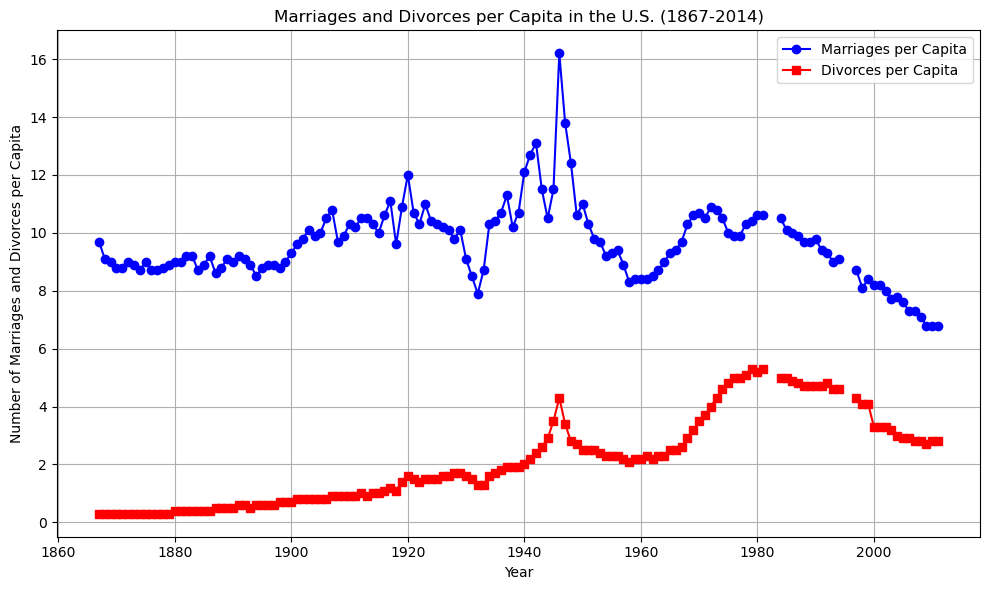

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset from this address:
file_path = "C:\\Users\\39440\\Desktop\\BDAT\\BDAT1004(Data Programming)\\assignment\\BDAT 1004  Problem Set 3\\us-marriages-divorces-1867-2014.csv"

# Read the CSV data into a pandas DataFrame
data = pd.read_csv(file_path)

# Extract the required columns
years = data['Year']
marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, marriages_per_capita, label='Marriages per Capita', color='blue', marker='o')
plt.plot(years, divorces_per_capita, label='Divorces per Capita', color='red', marker='s')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Marriages and Divorces per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Show the legend
plt.legend()

# Show the line plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

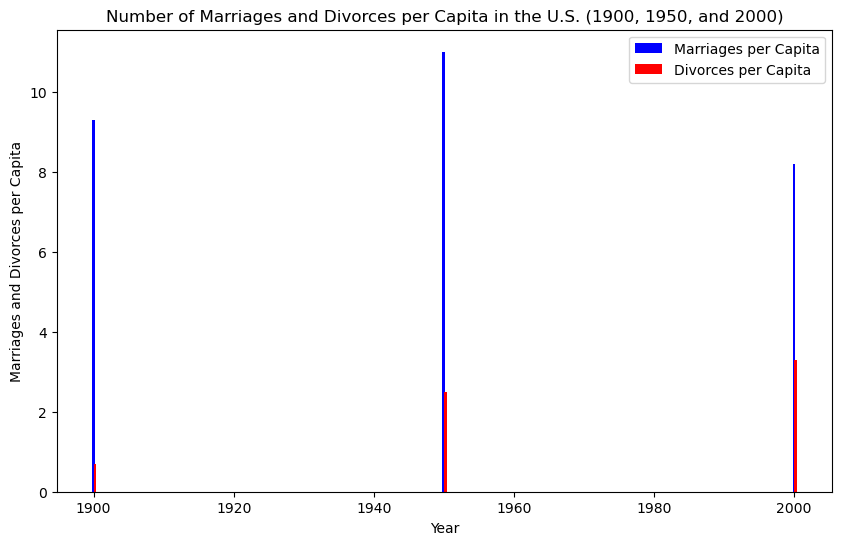

In [154]:
# Import the dataset from this address:
file_path = "C:\\Users\\39440\\Desktop\\BDAT\\BDAT1004(Data Programming)\\assignment\\BDAT 1004  Problem Set 3\\us-marriages-divorces-1867-2014.csv"

# Read the CSV data into a pandas DataFrame
data = pd.read_csv(file_path)

# Filter the data for years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

# Extract the required columns
years = filtered_data['Year']
marriages_per_capita = filtered_data['Marriages_per_1000']
divorces_per_capita = filtered_data['Divorces_per_1000']

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, marriages_per_capita, width=0.4, label='Marriages per Capita', align='center', color='b')
plt.bar(years, divorces_per_capita, width=0.4, label='Divorces per Capita', align='edge', color='r')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Marriages and Divorces per Capita')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')
plt.legend()

# Show the chart
plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

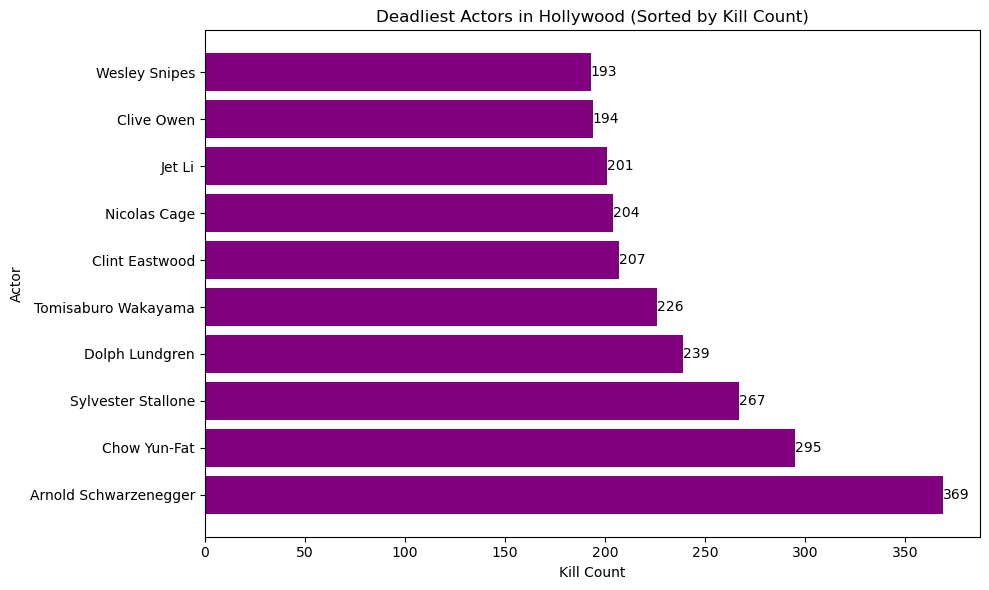

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset from this address:
file_path = "C:\\Users\\39440\\Desktop\\BDAT\\BDAT1004(Data Programming)\\assignment\\BDAT 1004  Problem Set 3\\actor_kill_counts.csv"

# Read the CSV data into a pandas DataFrame
data = pd.read_csv(file_path)

# Sort the data by kill count in descending order
sorted_data = data.sort_values(by='Count', ascending=False)  # Use the correct column name 'Count'

# Extract the required columns
actors = sorted_data['Actor']
kill_counts = sorted_data['Count']  # Use the correct column name 'Count'

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actors, kill_counts, color='purple')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood (Sorted by Kill Count)')

# Add labels to each bar
for index, value in enumerate(kill_counts):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

# Show the chart
plt.tight_layout()
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.

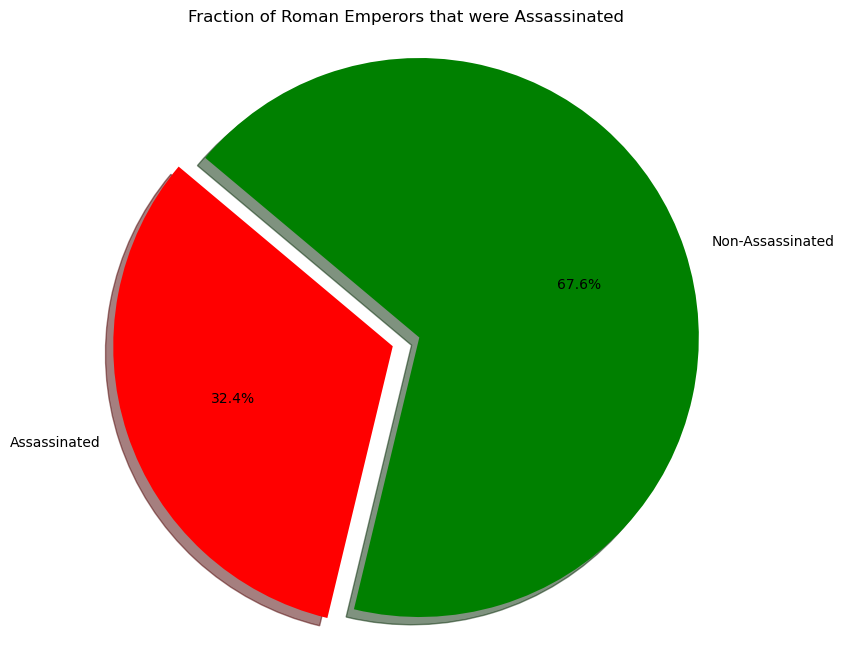

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset from this address:
file_path = "C:\\Users\\39440\\Desktop\\BDAT\\BDAT1004(Data Programming)\\assignment\\BDAT 1004  Problem Set 3\\roman-emperor-reigns.csv"

# Read the CSV data into a pandas DataFrame
data = pd.read_csv(file_path)

# Count the number of assassinations and non-assassinations
assassinated_count = (data['Cause_of_Death'] == 'Assassinated').sum()
non_assassinated_count = len(data) - assassinated_count

# Create the pie chart
labels = ['Assassinated', 'Non-Assassinated']
sizes = [assassinated_count, non_assassinated_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the first slice (Assassinated) for emphasis

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is a circle.

# Add a title
plt.title('Fraction of Roman Emperors that were Assassinated')

# Show the pie chart
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

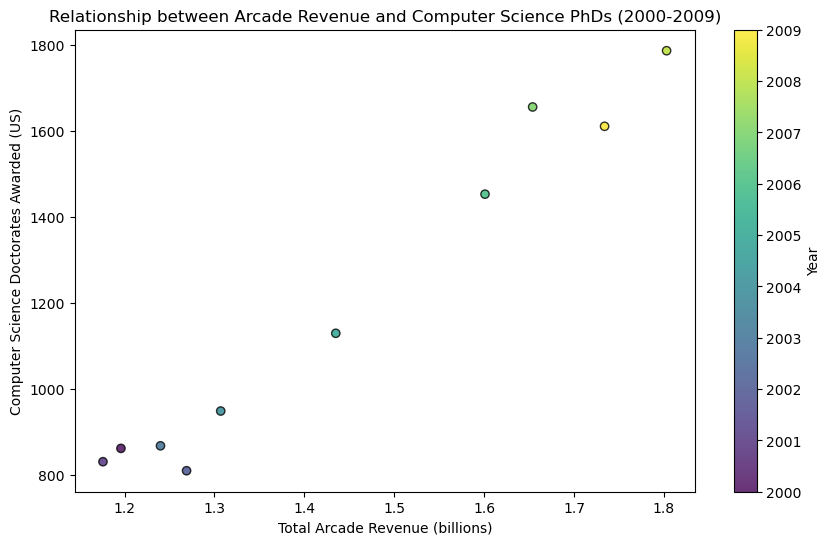

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset from this address:
file_path = "C:\\Users\\39440\\Desktop\\BDAT\\BDAT1004(Data Programming)\\assignment\\BDAT 1004  Problem Set 3\\arcade-revenue-vs-cs-doctorates.csv"

# Read the CSV data into a pandas DataFrame
data = pd.read_csv(file_path)

# Extract the required columns
revenue = data['Total Arcade Revenue (billions)']
doctorates = data['Computer Science Doctorates Awarded (US)']
years = data['Year']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(revenue, doctorates, c=years, cmap='viridis', alpha=0.8, edgecolors='k')

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')

# Add a colorbar for the years
cbar = plt.colorbar()
cbar.set_label('Year')

# Show the scatter plot
plt.show()